In [71]:
import numpy as np
import pandas as pd

In [72]:
df=pd.read_csv('kernel.csv',names=['log'])

In [73]:
df

,log
0,Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...
1,Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...
2,Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...
3,Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...
4,Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...
...,...
1987,Jul 27 14:41:59 combo kernel: pci_hotplug: PCI...
1988,Jul 27 14:42:00 combo kernel: isapnp: Scanning...
1989,Jul 27 14:42:00 combo kernel: isapnp: No Plug ...
1990,Jul 27 14:42:00 combo kernel: Real Time Clock ...


In [74]:
temp=[]
indexes=[]

for index,i in enumerate(df['log']):
    if('[' in i.split(' ')[5]):
        indexes.append(index)
        continue
    
    temp.append(i)

    
df = df.drop(indexes, axis=0) 

In [75]:
tar=[]
inputs=[]

for i, row in df.iterrows():
    temp=row['log'].split(' ')
    tar.append(temp[5])
    inputs.append(temp[4]+" ".join(temp[6:]))
    
print(df)    

                                                    log
0     Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...
1     Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...
2     Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...
3     Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...
4     Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...
...                                                 ...
1987  Jul 27 14:41:59 combo kernel: pci_hotplug: PCI...
1988  Jul 27 14:42:00 combo kernel: isapnp: Scanning...
1989  Jul 27 14:42:00 combo kernel: isapnp: No Plug ...
1990  Jul 27 14:42:00 combo kernel: Real Time Clock ...
1991  Jul 27 14:42:00 combo kernel: Linux agpgart in...

[1551 rows x 1 columns]


In [76]:
df=df.assign(Target=tar)
df

,log,Target
0,Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...,authentication
1,Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...,check
2,Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...,authentication
3,Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...,authentication
4,Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...,authentication
...,...,...
1987,Jul 27 14:41:59 combo kernel: pci_hotplug: PCI...,pci_hotplug:
1988,Jul 27 14:42:00 combo kernel: isapnp: Scanning...,isapnp:
1989,Jul 27 14:42:00 combo kernel: isapnp: No Plug ...,isapnp:
1990,Jul 27 14:42:00 combo kernel: Real Time Clock ...,Real


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_copy=df.Target
df.Target=le.fit_transform(df.Target)

In [78]:
# target_copy
df.Target

0       55
1       56
2       55
3       55
4       55
        ..
1987    70
1988    63
1989    63
1990    38
1991    30
Name: Target, Length: 1551, dtype: int32

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [80]:
target=df['Target']


In [81]:
inputs=cv.fit_transform(inputs)

In [82]:
inputs

<1551x1769 sparse matrix of type '<class 'numpy.int64'>'
	with 20896 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [85]:
X_train

<1240x1769 sparse matrix of type '<class 'numpy.int64'>'
	with 16724 stored elements in Compressed Sparse Row format>

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [87]:
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
model.score(X_test,y_test)

0.9581993569131833

In [89]:
 #KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [90]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [91]:
knn.score(X_test, y_test)

0.9517684887459807

In [92]:
def find_the_type_of_log(msg):
    data=[msg]
    vect=cv.transform(data).toarray()
    print(knn.predict(vect))
    predictions_test = le.inverse_transform(knn.predict(vect))
    print(predictions_test)
    return "This log might be related to : "+str(predictions_test[0])
    

In [93]:
print(find_the_type_of_log("closed for user test"))
# integerMapping=dict(zip(df.Target,target_copy))    

[76]
['session']
This log might be related to : session


In [94]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(42.0, 0.5, 'Truth')

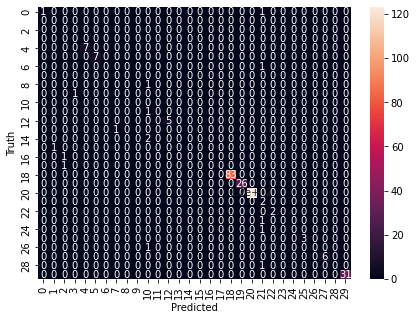

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          28       1.00      1.00      1.00         5
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.00    

C:\Users\jagan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [97]:
from sklearn.svm import SVC
svc = SVC()

In [98]:
svc.fit(X_train, y_train)

SVC()

In [99]:
svc.score(X_test, y_test)

0.954983922829582

In [100]:
def find_the_type_of_log_using_svc(msg):
    data=[msg]
    vect=cv.transform(data).toarray()
    print(svc.predict(vect))
    predictions_test = le.inverse_transform(svc.predict(vect))
    print(predictions_test)
    return "This log might be related to : "+str(predictions_test[0])

In [101]:
print(find_the_type_of_log_using_svc("closed for user test"))

[76]
['session']
This log might be related to : session


In [102]:
#Regularization

svc2 = SVC(C=10)
svc2.fit(X_train, y_train)
svc2.score(X_test, y_test)

0.9581993569131833

In [103]:
 #Gamma 
    
svc3 = SVC(gamma=100)
svc3.fit(X_train, y_train)
svc3.score(X_test, y_test)

0.4533762057877814

In [104]:
#Kernel 

svc_linear_kernal = SVC(kernel='linear')
svc_linear_kernal.fit(X_train, y_train)
svc_linear_kernal.score(X_test, y_test)

0.9581993569131833

In [105]:
   # Decision Trees 
from sklearn import tree
tree=tree.DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_train,y_train)

0.9991935483870967

In [106]:
def find_the_type_of_log_using_decision_trees(msg):
    data=[msg]
    vect=cv.transform(data).toarray()
    print(tree.predict(vect))
    predictions_test = le.inverse_transform(tree.predict(vect))
    print(predictions_test)
    return "This log might be related to : "+str(predictions_test[0])

In [107]:
print(find_the_type_of_log_using_decision_trees("closed for user test"))

[76]
['session']
This log might be related to : session


In [108]:
  # Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=20)
rand_forest.fit(X_train, y_train)    
rand_forest.score(X_test, y_test)

0.954983922829582

In [110]:
def find_the_type_of_log_using_random_forest_classifier(msg):
    data=[msg]
    vect=cv.transform(data).toarray()
    print(rand_forest.predict(vect))
    predictions_test = le.inverse_transform(rand_forest.predict(vect))
    print(predictions_test)
    return "This log might be related to : "+str(predictions_test[0])

In [111]:
print(find_the_type_of_log_using_random_forest_classifier("closed for user test"))

[76]
['session']
This log might be related to : session


In [114]:
# K Means Clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(inputs)
y_predicted

array([2, 1, 2, ..., 1, 1, 1])

In [120]:
df['Results']=y_predicted

In [121]:
df

,log,Target,Results
0,Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...,55,2
1,Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...,56,1
2,Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...,55,2
3,Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...,55,2
4,Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...,55,2
...,...,...,...
1987,Jul 27 14:41:59 combo kernel: pci_hotplug: PCI...,70,1
1988,Jul 27 14:42:00 combo kernel: isapnp: Scanning...,63,1
1989,Jul 27 14:42:00 combo kernel: isapnp: No Plug ...,63,1
1990,Jul 27 14:42:00 combo kernel: Real Time Clock ...,38,1


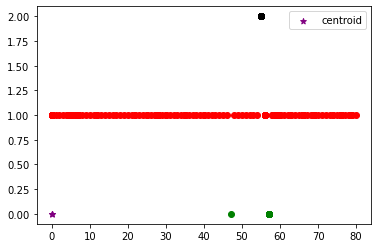

In [122]:
df1 = df[df.Results==0]
df2 = df[df.Results==1]
df3 = df[df.Results==2]
plt.scatter(df1.Target,df1['Results'],color='green')
plt.scatter(df2.Target,df2['Results'],color='red')
plt.scatter(df3.Target,df3['Results'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [123]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(inputs)
    sse.append(km.inertia_)

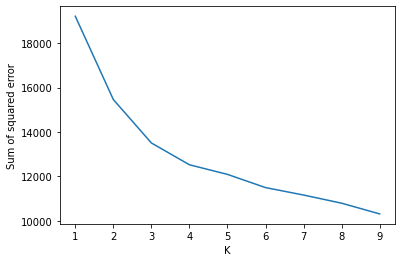

In [124]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [128]:
# Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

0.9453376205787781

In [130]:
def find_the_type_of_log_using_naive_bayes(msg):
    data=[msg]
    vect=cv.transform(data).toarray()
    print(mnb.predict(vect))
    predictions_test = le.inverse_transform(mnb.predict(vect))
    print(predictions_test)
    return "This log might be related to : "+str(predictions_test[0])

In [131]:
print(find_the_type_of_log_using_naive_bayes("closed for user test"))

[76]
['session']
This log might be related to : session
